In [1]:
%load_ext autoreload

In [2]:
%autoreload
from tqdm.notebook import tqdm

from diff3d import DLA_diff3d

In [3]:
x, y, z = [40, 60, 40]
eta = 4
dla = DLA_diff3d(seed=[x//2, y - 1, z//2], x=x, y=y, z=z, eta=eta, w=1)

while not dla.converged:
    dla.update()

for t in tqdm(range(150)):
    dla.growth(t + 1)

    while not dla.converged:
        dla.update()

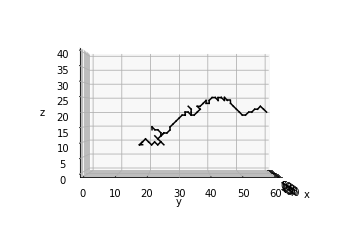

In [4]:
dla.tree.plot()

In [7]:
dla.tree.get_asymmetry_index()

0.8